<a href="https://colab.research.google.com/github/webabdullah/MACHING_LEARNING/blob/main/abdullah_Linier_Regresion_1_titanic_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum ke 5 Linier Regresion Menggunakan datashet titanic_all.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

In [ ]:
titanic = pd.read_csv("titanic_all.csv")
print("data :",titanic.shape)
titanic.info()
titanic.head()

data : (1309, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#------------BASIC SUMMARY--------------------------------
titanic.describe() #analisa deskriptif
#------------------------------
display(titanic.describe(include=np.number).transpose()) #numeric
display(titanic.describe(include=np.object).transpose()) #categorical

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


,count,unique,top,freq
Name,1309,1307,"Kelly, Mr. James",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914


In [ ]:
#----------visualisasi---------------
def countplot(column):
 return sns.countplot(x=column, data=titanic)

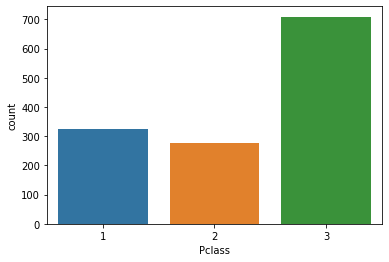

In [ ]:
#-------------------------------
countplot('Pclass')


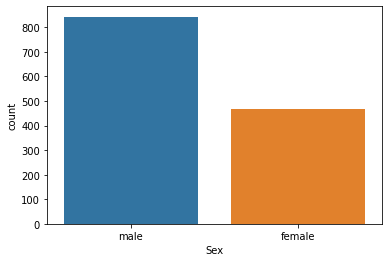

In [ ]:
countplot('Sex')


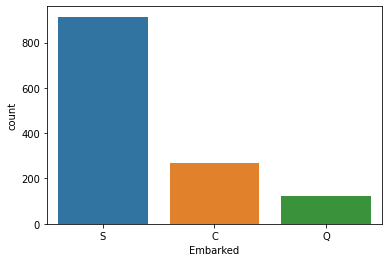

In [ ]:
countplot('Embarked')


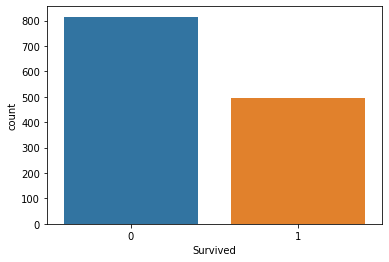

In [ ]:
countplot('Survived')

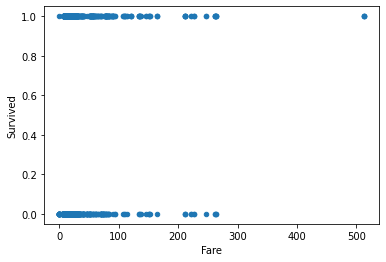

In [ ]:
#------------------------------
titanic.plot.scatter(x="Fare", y='Survived', figsize=(6,4))

Text(0.5, 1.0, 'Correlation between feature')

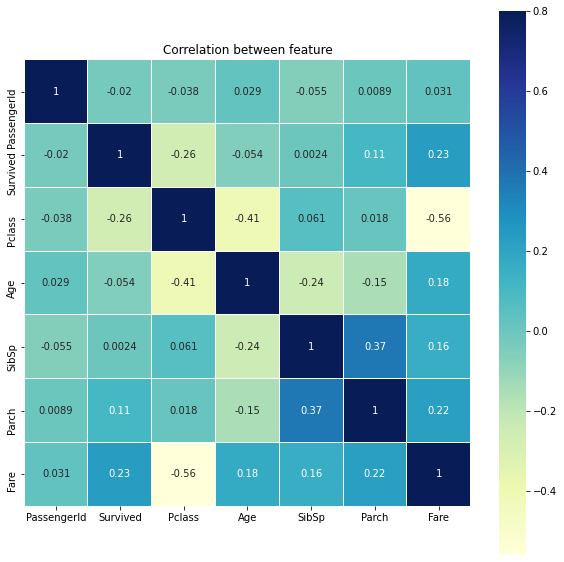

In [ ]:
#------------KORELASI------------
titanic.corr(method='pearson')
corr= titanic.corr() #survived
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True,cmap='YlGnBu', linecolor="white")
plt.title('Correlation between feature')

In [ ]:
def compute_freq_chi2(x,y):
 freqtab = pd.crosstab(x,y)
 print("Frequency Table")
 print("----------------")
 print(freqtab)
 print("----------------")
 chi2, pval, df, expected = scp.chi2_contingency(freqtab)
 print("Chisquare test statistic", chi2)
 print("p-value", pval)
 return

In [ ]:
compute_freq_chi2(titanic.Survived, titanic.Pclass)
compute_freq_chi2(titanic.Survived, titanic.Embarked)
compute_freq_chi2(titanic.Survived, titanic.Sex)

Frequency Table
----------------
Pclass      1    2    3
Survived               
0         137  160  518
1         186  117  191
----------------
Chisquare test statistic 91.72367559290264
p-value 1.2090852275863847e-20
Frequency Table
----------------
Embarked    C   Q    S
Survived              
0         137  69  609
1         133  54  305
----------------
Chisquare test statistic 24.684434014740326
p-value 4.363583182075015e-06
Frequency Table
----------------
Sex       female  male
Survived              
0             81   734
1            385   109
----------------
Chisquare test statistic 617.3133522952658
p-value 2.871410444001617e-136


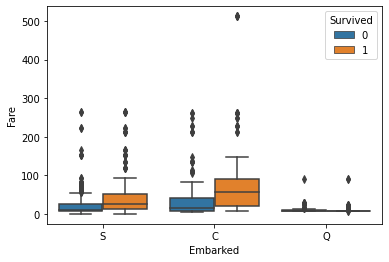

In [ ]:
sns.boxplot(x="Embarked", y="Fare", hue="Survived", data=titanic)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


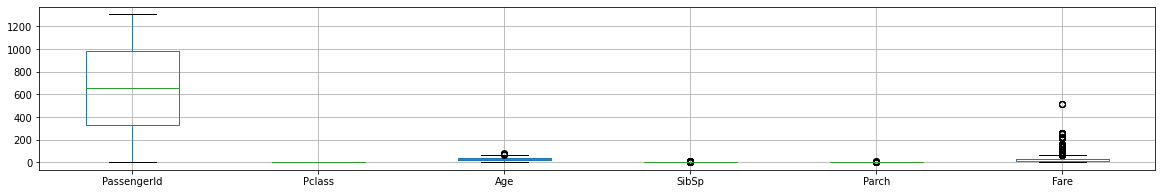

In [ ]:
data2=titanic.drop(['Survived'], axis=1)
data2.boxplot(figsize=(20,3))

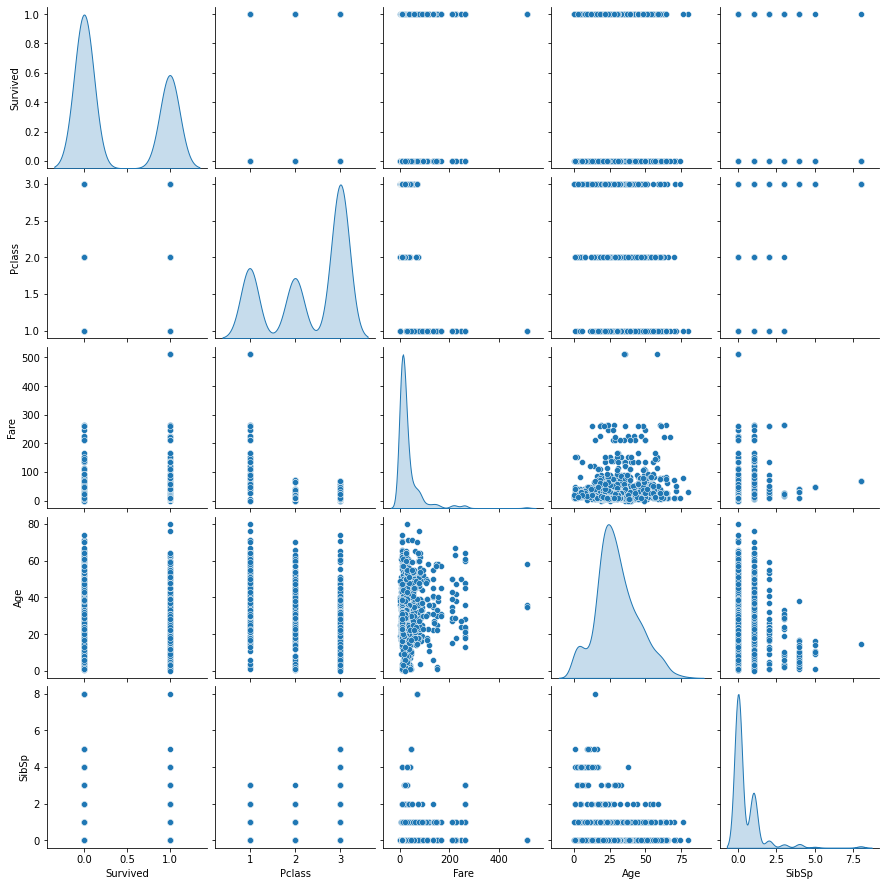

In [ ]:
col = (['Survived', 'Pclass', 'Embarked', 'Fare', 'Age', 'SibSp'])
sns.pairplot(titanic[col], kind='scatter', diag_kind='kde')
plt.show()

In [ ]:
#----------Data Cleaning ----------------
titanic.duplicated(keep=False).sum()

0

In [ ]:
# ------------cek Null--------------
def cek_null(df) :
 col_na = df.isnull().sum().sort_values(ascending=False)
 percent = col_na / len(df)
 missing_data = pd.concat([col_na, percent], axis=1, keys=['Total','Percent'])
 print(missing_data[missing_data['Total'] > 0])
cek_null(titanic)
titanic['Cabin'].str.split(" ",expand=True).count().rename(lambda x : x+1)
(titanic
.groupby([titanic.Cabin.str[:1],'Survived'])
.Survived
.count()
.unstack())
(titanic
.groupby([titanic.Cabin.str[:1],'Survived'])
.Fare
.mean()
.unstack())

          Total   Percent
Age         263  0.200917
Embarked      2  0.001528
Fare          1  0.000764


Survived,0,1
Cabin,,
A,37.977425,45.164580
B,81.865871,141.720836
C,102.199170,112.169137
D,43.420562,58.120287
E,59.980446,52.050150
F,10.480840,24.987118
G,10.462500,16.700000
T,35.500000,NaN
U,16.507897,24.975836


In [ ]:
 # ----------------mengisi data null--------------
titanic['Cabin'] = titanic['Cabin'].fillna('U')
(titanic.groupby([titanic.Cabin.str[:1],'Survived'])
 .Survived
 .count()
 .unstack())
cek_null(titanic)

          Total   Percent
Age         263  0.200917
Embarked      2  0.001528
Fare          1  0.000764


In [ ]:
#------------menghapus data-----------------
titanic_cleaned = titanic.drop(['Name','Ticket', 'Cabin'],axis=1)
titanic_cleaned.head()
cek_null(titanic)

          Total   Percent
Age         263  0.200917
Embarked      2  0.001528
Fare          1  0.000764


In [ ]:
#--------------mengisi data null
titanic_cleaned['Age'] = titanic_cleaned['Age'].fillna(30)
cek_null(titanic_cleaned)

          Total   Percent
Embarked      2  0.001528
Fare          1  0.000764


In [ ]:
#--------------mengisi data null
titanic_cleaned['Embarked'] = titanic_cleaned['Embarked'].fillna('C')
cek_null(titanic_cleaned)
titanic_cleaned[titanic_cleaned['Fare'].isnull()]

      Total   Percent
Fare      1  0.000764


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1043,1044,0,3,male,60.5,0,0,NaN,S


In [ ]:
#-------------menghapus data record
titanic_cleaned.dropna(inplace=True)
titanic_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#------------ backup titanic_cleaned
titanic_cleaned2 = titanic_cleaned
titanic_cleaned2.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#------- mencoba linear regression dengan variable dependent “Fare”, variable independent “Age”
#-------drop attribute yang tidak diperlukan, sehingga hanya attribute “Fare” dan “Age”
titanic_cleaned.drop(['Sex','Embarked','Pclass', 'PassengerId'], axis=1,inplace=True)
titanic_cleaned.head()
titanic_cleaned.drop(['SibSp','Parch','Survived'], axis=1,inplace=True)
titanic_cleaned.head()


,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
#-----Proses linear regression

X=titanic_cleaned.iloc[:, :-1].values
Y=titanic_cleaned.iloc[:, 1].values


In [ ]:
print(Y)

[ 7.25   71.2833  7.925  ...  7.25    8.05   22.3583]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)


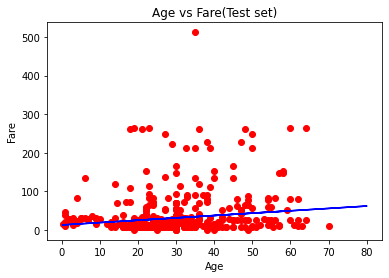

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue' )
plt.title('Age vs Fare(Test set)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [ ]:
#------- mencoba linear regression dengan variable dependent “Survived”, variable independent“Age”
#-------drop attribute yang tidak diperlukan, sehingga hanya attribute “Survibed” dan “Age”


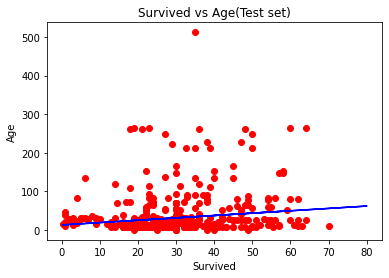

In [ ]:
#----- Proses Linear Regression
X=titanic_cleaned2.iloc[:, :-1].values
Y=titanic_cleaned2.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue' )
plt.title('Survived vs Age(Test set)')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()